In [14]:
import numpy
from numpy import pi as PI
import paddle 
from paddle import matmul
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import random_pauli_str_generator, pauli_str_to_matrix, dagger

N = 2  # 量子比特数/量子神经网络的宽度
SEED = 14  # 固定随机种子
# 生成用泡利字符串表示的随机 Hamilton 量
numpy.random.seed(SEED)
hamiltonian = random_pauli_str_generator(N, terms=10)
print("Random Hamiltonian in Pauli string format = \n", hamiltonian)

# 生成 Hamilton 量的矩阵信息
H = pauli_str_to_matrix(hamiltonian, N)
print(H)
THETA_SIZE = 15  # 量子神经网络中参数的数量

def U_theta(theta, N):
    """
    U_theta
    """
    # 按照量子比特数量/网络宽度初始化量子神经网络
    cir = UAnsatz(N)
    
    # 调用内置的量子神经网络模板
    cir.universal_2_qubit_gate(theta, [0, 1])

    # 返回量子神经网络所模拟的酉矩阵 U
    return cir.U
class Net(paddle.nn.Layer):
    def __init__(self, shape, dtype='float64'):
        super(Net, self).__init__()
        
        # 初始化 theta 参数列表，并用 [0, 2*pi] 的均匀分布来填充初始值
        self.theta = self.create_parameter(shape=shape,
                                           default_initializer=paddle.nn.initializer.Uniform(low=0.0, high=2*PI),
                                           dtype=dtype, is_bias=False)
    
    # 定义损失函数和前向传播机制
    def forward(self, H, N):
        
        # 构造量子神经网络
        U = U_theta(self.theta, N)
        
        # 计算损失函数
        loss_struct = paddle.real(matmul(matmul(dagger(U), H), U))

        # 输入计算基去计算每个子期望值，相当于取 U^dagger*H*U 的对角元 
        loss_components = [
            loss_struct[0][0],
            loss_struct[1][1],
            loss_struct[2][2],
            loss_struct[3][3]
        ]
        
        # 最终加权求和后的损失函数
        loss = 4 * loss_components[0] + 3 * loss_components[1]\
             + 2 * loss_components[2] + 1 * loss_components[3]
        
        return loss, loss_components

ITR = 100 # 设置训练的总迭代次数
LR = 0.3 # 设置学习速率

paddle.seed(SEED)
    
# 我们需要将 numpy.ndarray 转换成 PaddlePaddle 支持的 Tensor
hamiltonian = paddle.to_tensor(H)

# 确定网络的参数维度
net = Net(shape=[THETA_SIZE])

# 一般来说，我们利用 Adam 优化器来获得相对好的收敛，
# 当然你可以改成 SGD 或者是 RMS prop.
opt = paddle.optimizer.Adam(learning_rate=LR, parameters=net.parameters())

# 优化循环
for itr in range(1, ITR + 1):

    # 前向传播计算损失函数并返回估计的能谱
    loss, loss_components = net(hamiltonian, N)

    # 在动态图机制下，反向传播极小化损失函数
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # 打印训练结果
    if itr % 10 == 0:
        print('iter:', itr, 'loss:', '%.4f' % loss.numpy()[0])
print('The estimated ground state energy is: ', loss_components[0].numpy())
print('The theoretical ground state energy: ', 
numpy.linalg.eigh(H)[0][0])

print('The estimated 1st excited state energy is: ', loss_components[1].numpy())
print('The theoretical 1st excited state energy: ', numpy.linalg.eigh(H)[0][1])

print('The estimated 2nd excited state energy is: ', loss_components[2].numpy())
print('The theoretical 2nd excited state energy: ', numpy.linalg.eigh(H)[0][2])

print('The estimated 3rd excited state energy is: ', loss_components[3].numpy())
print('The theoretical 3rd excited state energy: ', numpy.linalg.eigh(H)[0][3])

/usr/local/anaconda3/envs/paddle_quantum_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/anaconda3/envs/paddle_quantum_env/lib/python3.7/site-packages/paddle/fluid/framework.py:687: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif dtype == np.bool:
/usr/local/anaconda3/envs/paddle_quantum_env/lib/python3.7/site-packages/paddle/tensor/creation.py:143: Deprecatio

In [50]:
#numpy 求特征值和特征向量
import numpy as np
A= np.array([[3,1],[1,2]])
b = np.array([9,8])
#矩阵的转置
Atr = A.transpose()
#矩阵的特征值和特征向量
eig,eigv = np.linalg.eig(A)
#求矩阵的逆
Ainv = np.linalg.inv(A)
#求解线性方程组
x = np.linalg.solve(A,b)
#求行列式
Adel = np.linalg.det(A)
#矩阵的迹
Atrace = np.trace(A)

/usr/local/anaconda3/envs/paddle_quantum_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/anaconda3/envs/paddle_quantum_env/lib/python3.7/site-packages/paddle/fluid/framework.py:687: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif dtype == np.bool:


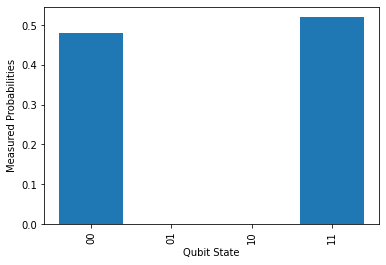

我们制备出的贝尔态是:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [51]:
import numpy as np
import paddle
from paddle_quantum.circuit import UAnsatz

# 初始化量子电路
cir = UAnsatz(2)

# 添加量子门
cir.h(0)
cir.cnot([0, 1])  

# 制备输出态
# 如果用户不输入初始量子态，默认初始为|00..0>
output_state = cir.run_state_vector()

# 我们测量输出态2048次，获得测量结果频率分布
# 如果用户想获取概率分布的理论值，可以令 shots = 0
cir.measure(shots = 2048, plot = True)

print('我们制备出的贝尔态是:')
print(output_state.numpy())

In [48]:
import numpy as np
import paddle
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import pauli_str_to_matrix

# 首先生成泡利字符串表示下的哈密顿量
# 相当于0.4*kron(I, Z) + 0.4*kron(Z, I) + 0.2*kron(X, X)
# 其中， X，Y, Z是泡利矩阵， I是单位矩阵
H_info = [[0.4, 'z0'], [0.4, 'z1'], [0.2, 'x0,x1']]

# 超参数设置
num_qubits = 2
theta_size = 4
ITR = 60
LR = 0.4
SEED = 999       

# 把记录的关于哈密顿量的信息转化为矩阵表示
H_matrix = pauli_str_to_matrix(H_info, num_qubits)
print(H_matrix)
class vqe_demo(paddle.nn.Layer):
    
    def __init__(self, shape, dtype='float64'):
        super(vqe_demo, self).__init__()
        
        # 初始化一个长度为theta_size的可学习参数列表，并用[0, 2*pi]的均匀分布来填充初始值
        self.theta = self.create_parameter(shape=shape, 
                                           default_initializer=paddle.nn.initializer.Uniform(low=0., high=2*np.pi), 
                                           dtype=dtype, is_bias=False)
        self.H = paddle.to_tensor(H)
        
    # 定义损失函数和前向传播机制
    def forward(self):
        
        # 初始量子电路
        cir = UAnsatz(num_qubits)
        
        # 添加量子门
        cir.ry(self.theta[0], 0)
        cir.ry(self.theta[1], 1)
        cir.cnot([0, 1])
        cir.ry(self.theta[2], 0)
        cir.ry(self.theta[3], 1)
        
        # 选择用量子态的向量表示
        cir.run_state_vector()
        
        # 计算当前量子态下关于观测量H_info的期望值
        # 也就是 <psi|H|psi>
        loss = cir.expecval(H_info)
        
        return loss
loss_list = []
parameter_list = []

# 定义网络维度
vqe = vqe_demo([theta_size])

# 一般来说，我们利用Adam优化器来获得相对好的收敛，当然你可以改成SGD或者是RMS prop.
opt = paddle.optimizer.Adam(learning_rate = LR, parameters = vqe.parameters())    

# 优化循环
for itr in range(ITR):

    # 前向传播计算损失函数
    loss = vqe()

    # 反向传播极小化损失函数
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # 记录学习曲线
    loss_list.append(loss.numpy()[0])
    parameter_list.append(vqe.parameters()[0].numpy())
    if itr % 10 == 0:
        print('iter:', itr, '  loss: %.4f' % loss.numpy())


print('计算得到的基态能量是: ', loss_list[-1])
print('真实的基态能量为: ', np.linalg.eigh(H_matrix)[0][0])

[[ 0.8+0.j  0. +0.j  0. +0.j  0.2+0.j]
 [ 0. +0.j  0. +0.j  0.2+0.j  0. +0.j]
 [ 0. +0.j  0.2+0.j  0. +0.j  0. +0.j]
 [ 0.2+0.j  0. +0.j  0. +0.j -0.8+0.j]]


In [56]:
import numpy as np
import paddle
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import pauli_str_to_matrix
# 首先生成泡利字符串表示下的哈密顿量
# 相当于0.4*kron(I, Z) + 0.4*kron(Z, I) + 0.2*kron(X, X)
# 其中， X，Y, Z是泡利矩阵， I是单位矩阵
#A_info = [['I'], [0.2, 'x0,z1'], [0.2, 'x0']]
A_info = [[0.4, 'z0'], [0.4, 'z1'], [0.2, 'x0,x1']]

b_info = [[1,'H0'],[1,'H1'],[1,'H2']]

# 超参数设置
num_qubits = 2
theta_size = 4
ITR = 60
LR = 0.4
SEED = 999       

# 把记录的关于哈密顿量的信息转化为矩阵表示
A_matrix = pauli_str_to_matrix(A_info, num_qubits)
print(A_matrix)

def cost_fun(weight):



[[ 0.8+0.j  0. +0.j  0. +0.j  0.2+0.j]
 [ 0. +0.j  0. +0.j  0.2+0.j  0. +0.j]
 [ 0. +0.j  0.2+0.j  0. +0.j  0. +0.j]
 [ 0.2+0.j  0. +0.j  0. +0.j -0.8+0.j]]


In [67]:
import numpy
from numpy import pi as PI
import paddle 
import math
from paddle import matmul
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import random_pauli_str_generator, pauli_str_to_matrix, dagger

qubits = 3

# cir.s(0)
# # help(cir)
# print('量子门S的矩阵表达式为：')
# print(cir.U.numpy())
# cir.h(0)
# print('H gate',cir.U.numpy())
def apply_fixed_ansatz(qubits,theta):
    cir = UAnsatz(qubits)
    print(cir)

/usr/local/anaconda3/envs/paddle_quantum_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
